In [1]:
import tensorflow as tf
from datasets import load_dataset as ld
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pandas as pd
import numpy as np

# Preprocessing Data

In [5]:
train_df, test_df = pd.read_csv('seed.csv'), pd.read_csv('test.csv')

In [6]:
total_df = pd.concat([train_df,test_df],axis=0)

In [7]:
def print_plot(index):
    example = train_df[train_df.index == index][['example', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])

In [8]:
print_plot(20)

Buyer: Hi tell me about the battery Seller: It is for a Motorola model BK10. Each battery will come with an extended battery cover Buyer: Are those the batteries that explode? Seller: Explosions are not likely, especially when inserted into a device or using the battery cover Buyer: Ok, can you go down to 9? Seller: Yes Buyer: Ok deal! Buyer:  Seller: 
Product: phone


In [9]:
id_to_label = {id : label for id, label in enumerate(total_df.label.unique())}
label_to_id = {label : id  for id, label in enumerate(total_df.label.unique())}

In [10]:
train_df['label']= train_df['label'].map(label_to_id)
test_df['label'] = test_df['label'].map(label_to_id)

In [11]:
max_sequence_length = 0 
for text in total_df['example']:
    max_sequence_length = max(max_sequence_length,len(text))

In [12]:
max_sequence_length

2285

- Processing Text Data

In [13]:
# Parameters 
vocab_size = 1000 
emebed_size = 20 
epochs = 50
batch_size = 30 

In [14]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(test_df['example'])

## LSTM Text Classification Model


In [15]:
rnn_model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=emebed_size,input_length = max_sequence_length), 
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(units=400,dropout=0.20),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(units=len(total_df.label.unique()), activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2285, 20)          20000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 2285, 20)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 400)               673600    
                                                                 
 layer_normalization (LayerN  (None, 400)              800       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 6)                 2406      
                                                                 
Total params: 696,806
Trainable params: 696,806
Non-trai

In [17]:
test_sequences = tokenizer.texts_to_sequences(test_df['example'])
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post')

In [18]:
from sklearn.metrics import precision_recall_fscore_support

In [19]:
test_df['example']

0      Seller: Hi are you interested in buying my Pin...
1      Buyer: Hello I am interested in your property ...
2      Buyer: Hello . How long have you owned the dre...
3      Buyer: I am very interested place you have for...
4      Buyer: Hey, nice car you have here, how long h...
                             ...                        
995    Buyer: Hi! Seller: Hello.  How are you? Buyer:...
996    Seller: Hi how are you? Buyer: I'm wonderful! ...
997    Buyer: hello I am interested in the yukon you ...
998    Seller: Hi there, are you interested in my pro...
999    Seller: Hello. Buyer: Hi. Would you do 10$ on ...
Name: example, Length: 1000, dtype: object

In [20]:
label_count = 0 
accs = [] 
precisions = [] 
recalls = [] 
f1s = []
labels = []

for i in range(15):
    label_count += 10
    labels.append(label_count)
    
    sequences = tokenizer.texts_to_sequences(test_df['example'][:label_count])
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

    rnn_model.fit(padded_sequences, test_df['label'][:label_count], epochs=35,validation_data=(test_padded_sequences, test_df['label']))
    
    predictions = rnn_model.predict(test_padded_sequences)
    predicted_labels = np.argmax(predictions, axis=1)
    
    
    precision, recall, f1, _ = precision_recall_fscore_support(test_df['label'], predicted_labels, average='macro',zero_division=1)

    
    accs.append(accuracy_score(test_df['label'],predicted_labels))
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    



Epoch 1/35
1/1 [==============================] - 7s 7s/step - loss: 1.6630 - accuracy: 0.3000 - val_loss: 2.0503 - val_accuracy: 0.2950
Epoch 2/35
1/1 [==============================] - 2s 2s/step - loss: 1.2191 - accuracy: 0.4000 - val_loss: 2.6787 - val_accuracy: 0.1340
Epoch 3/35
1/1 [==============================] - 2s 2s/step - loss: 1.1110 - accuracy: 0.2000 - val_loss: 3.3150 - val_accuracy: 0.2950
Epoch 4/35
1/1 [==============================] - 2s 2s/step - loss: 1.1366 - accuracy: 0.3000 - val_loss: 4.0371 - val_accuracy: 0.2950
Epoch 5/35
1/1 [==============================] - 2s 2s/step - loss: 1.2640 - accuracy: 0.4000 - val_loss: 4.2412 - val_accuracy: 0.1990
Epoch 6/35
1/1 [==============================] - 2s 2s/step - loss: 1.2247 - accuracy: 0.2000 - val_loss: 4.5445 - val_accuracy: 0.1340
Epoch 7/35
1/1 [==============================] - 2s 2s/step - loss: 1.4108 - accuracy: 0.3000 - val_loss: 4.1247 - val_accuracy: 0.2950
Epoch 8/35
1/1 [=========================

In [ ]:
result_df = pd.DataFrame({'True_Label': test_df['label'], 'Predicted_Label': predicted_labels})

In [ ]:
result_df.to_csv('evaluation/rnn_Cragigslist_label_predictions.csv', index=False)


In [ ]:
metrics_df = pd.DataFrame({
    'Label': labels,
    'Accuracy': accs,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s
})

In [ ]:
metrics_df.to_csv('evaluation/RNN_banking_labels_metrics_result.csv', index=False)


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

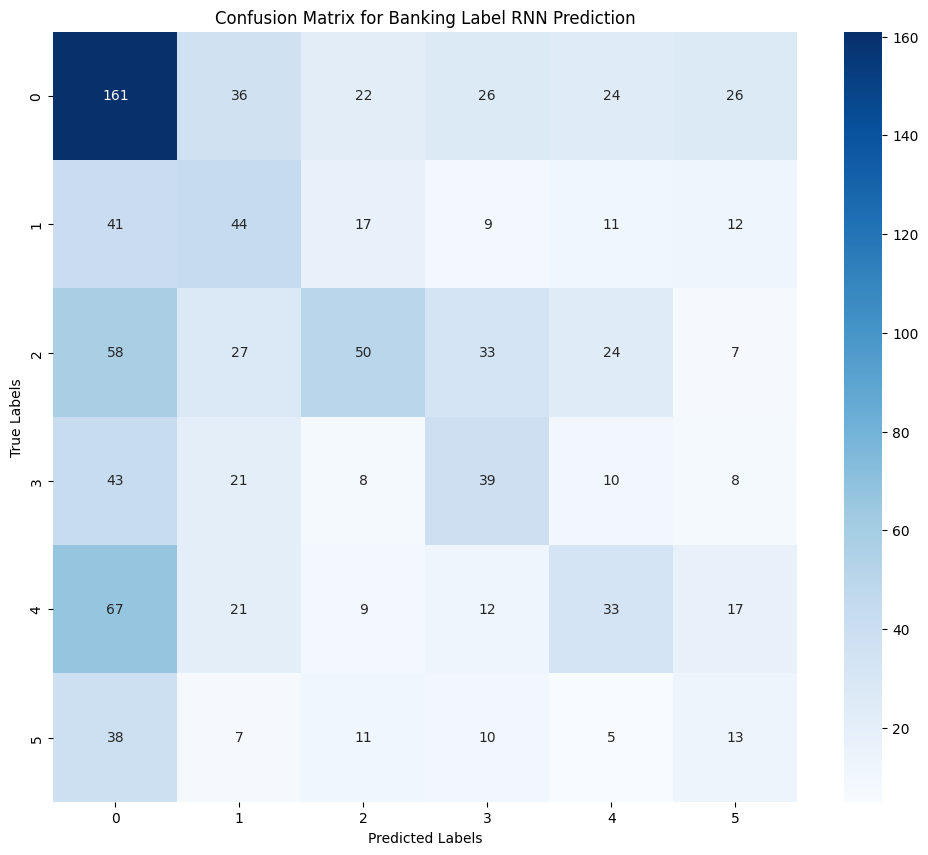

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_df['label'].to_list(),predicted_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Banking Label RNN Prediction')
plt.show()
# Save the heatmap as an image in the 'evaluation' folder
